In [1]:
import pandas as pd
police_killings = pd.read_csv("police_killings.csv", encoding="ISO-8859-1")
police_killings.head(5)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [2]:
police_killings.columns

Index([u'name', u'age', u'gender', u'raceethnicity', u'month', u'day', u'year',
       u'streetaddress', u'city', u'state', u'latitude', u'longitude',
       u'state_fp', u'county_fp', u'tract_ce', u'geo_id', u'county_id',
       u'namelsad', u'lawenforcementagency', u'cause', u'armed', u'pop',
       u'share_white', u'share_black', u'share_hispanic', u'p_income',
       u'h_income', u'county_income', u'comp_income', u'county_bucket',
       u'nat_bucket', u'pov', u'urate', u'college'],
      dtype='object')

In [3]:
counts = police_killings["raceethnicity"].value_counts()
print(counts)

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64


([<matplotlib.axis.XTick at 0x10f02cdd0>,
 <a list of 6 Text xticklabel objects>)

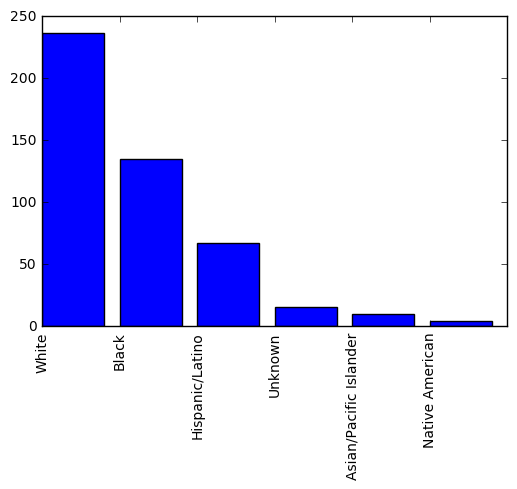

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(6), counts)
plt.xticks(range(6), counts.index, rotation="vertical")

In [5]:
counts / sum(counts)

White                     0.505353
Black                     0.289079
Hispanic/Latino           0.143469
Unknown                   0.032120
Asian/Pacific Islander    0.021413
Native American           0.008565
Name: raceethnicity, dtype: float64

It looks like people identified as Black are far overrepresented in the shootings versus in the population of the US (28% vs 16%). You can see the breakdown of population by race here.
People identified as Hispanic appear to be killed about as often as random chance would account for (14% of the people killed as Hispanic, versus 17% of the overall population).
Whites are underrepresented among shooting victims vs their population percentage, as are Asians.

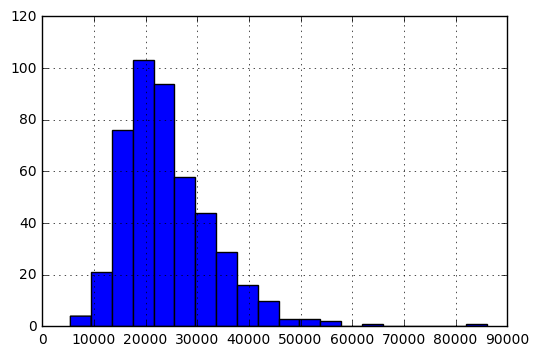

In [6]:
police_killings["p_income"][police_killings["p_income"] != "-"].astype(float).hist(bins=20)

In [7]:
police_killings["p_income"][police_killings["p_income"] != "-"].astype(float).median()

22348.0

According to the Census, median personal income in the US is 28,567, and our median is 22,348, which means that shootings tend to happen in less affluent areas. Our sample size is relatively small, though, so it's hard to make sweeping conclusions.

In [8]:
state_pop = pd.read_csv("state_population.csv")

In [9]:
counts = police_killings["state_fp"].value_counts()

states = pd.DataFrame({"STATE": counts.index, "shootings": counts})

In [10]:
states = states.merge(state_pop, on="STATE")


In [11]:
states["pop_millions"] = states["POPESTIMATE2015"] / 1000000
states["rate"] = states["shootings"] / states["pop_millions"]

states.sort("rate")

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,rate
43,9,1,40,1,1,Connecticut,3590886,2826827,78.7,3.590886,0.278483
22,42,7,40,1,2,Pennsylvania,12802503,10112229,79.0,12.802503,0.546768
38,19,2,40,2,4,Iowa,3123899,2395103,76.7,3.123899,0.640226
6,36,13,40,1,2,New York,19795791,15584974,78.7,19.795791,0.656705
29,25,5,40,1,1,Massachusetts,6794422,5407335,79.6,6.794422,0.735898
42,33,1,40,1,1,New Hampshire,1330608,1066610,80.2,1.330608,0.751536
45,23,1,40,1,1,Maine,1329328,1072948,80.7,1.329328,0.752260
11,17,11,40,2,3,Illinois,12859995,9901322,77.0,12.859995,0.855366
12,39,10,40,2,3,Ohio,11613423,8984946,77.4,11.613423,0.861073
31,55,5,40,2,3,Wisconsin,5771337,4476711,77.6,5.771337,0.866350


In [12]:
police_killings["state"].value_counts()

CA    74
TX    46
FL    29
AZ    25
OK    22
GA    16
NY    14
CO    12
WA    11
NJ    11
IL    11
LA    11
OH    10
MD    10
NC    10
MO    10
VA     9
MI     9
SC     9
OR     8
AL     8
IN     8
KY     7
PA     7
TN     6
NE     6
MN     6
MS     6
KS     6
WI     5
MA     5
UT     5
NM     5
AR     4
ID     4
HI     4
NV     3
IA     2
AK     2
WV     2
MT     2
DE     2
DC     1
ME     1
CT     1
WY     1
NH     1
Name: state, dtype: int64